In [5]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import multiprocessing as mp
import time
import glob
import re
import random
from sklearn.model_selection import train_test_split
import torch

sys.path.insert(0, '/Data/user/panhailin/git_lab/npspy')
import npspy as nps
from npspy import npsc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
metrics_dfs = []
train_sample_sizes = [25000, 20000, 15000, 10000, 5000]
for ds in train_sample_sizes:
    pred_proba_df = pd.read_csv(f"../../../04.tables/classification/GSXGS/clean/clean_data_large_group_ds_{ds}_pred_proba.csv", index_col=0)
    metrics_df = npsc.get_metrics_from_pred_proba_df(pred_proba_df)
    metrics_df.index = [f'clean_{ds}']
    metrics_dfs.append(metrics_df)

for ds in train_sample_sizes:
    pred_proba_df = pd.read_csv(f"../../../04.tables/classification/GSXGS/valid/valid_data_large_group_ds_{ds}_pred_proba.csv", index_col=0)
    metrics_df = npsc.get_metrics_from_pred_proba_df(pred_proba_df)
    metrics_df.index = [f'raw_{ds}']
    metrics_dfs.append(metrics_df)

metrics_df = pd.concat(metrics_dfs)
metrics_df

,accuracy,precision,recall,f1_score,jaccard_score
clean_25000,0.933056,0.933164,0.933056,0.933104,0.875254
clean_20000,0.928722,0.928888,0.928722,0.928795,0.867846
clean_15000,0.924278,0.924376,0.924278,0.924315,0.860112
clean_10000,0.916222,0.916516,0.916222,0.916330,0.846553
clean_5000,0.901722,0.901663,0.901722,0.901684,0.822079
raw_25000,0.907833,0.908107,0.907833,0.907935,0.832371
raw_20000,0.906667,0.906601,0.906667,0.906620,0.830230
raw_15000,0.896778,0.896748,0.896778,0.896706,0.813818
raw_10000,0.884944,0.885169,0.884944,0.884980,0.795004
raw_5000,0.875667,0.875066,0.875667,0.875074,0.779413


<PolarAxes: >

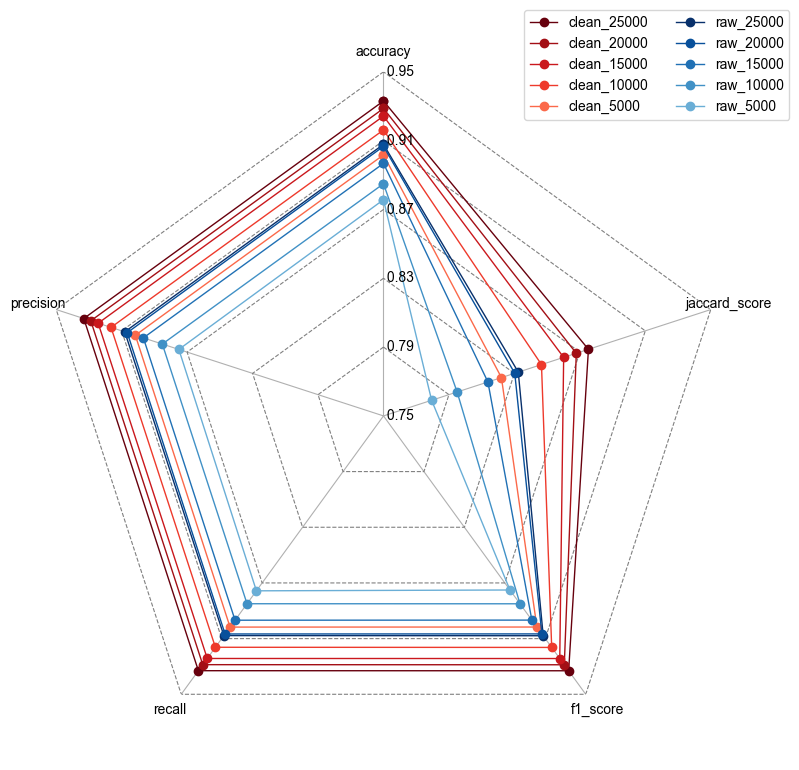

In [7]:
npsc.draw_radar_plot_with_two_cmps(metrics_df, y_min=0.75, y_max=0.95)

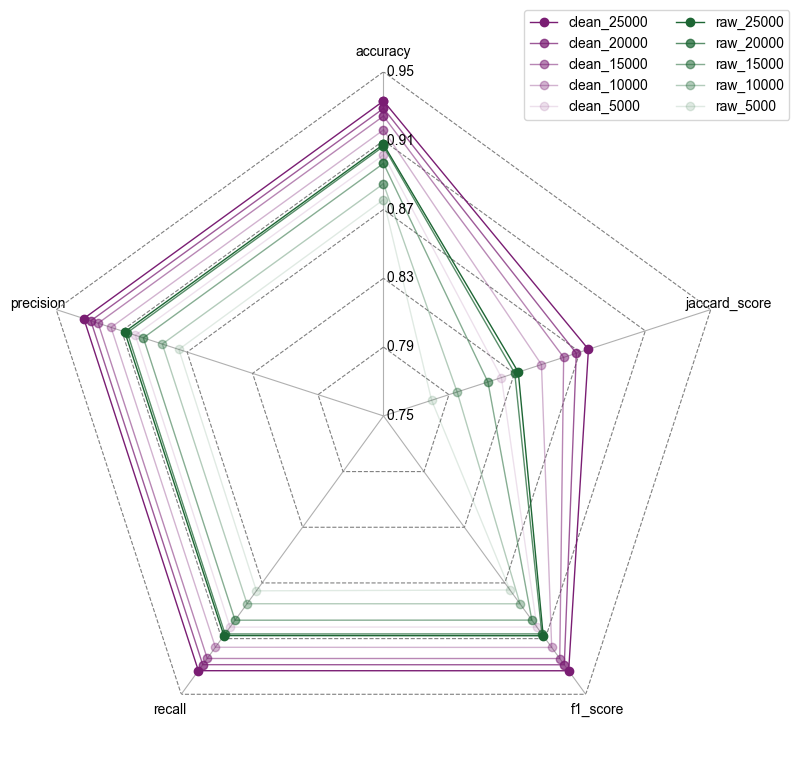

In [8]:
npsc.draw_radar_plot(metrics_df, y_min=0.75, y_max=0.95, 
                     colors=['#7A1D73FF', '#7A1D73BB', '#7A1D7388', '#7A1D7355', '#7A1D7322',
                             '#1D6634FF', '#1D6634BB', '#1D663488', '#1D663455', '#1D663422',]
                    )
plt.savefig("../../../05.figures/classification/GSXGS/large_group_diff_ds_rada_plot.pdf", bbox_inches='tight')